## 2 - Comparing Different Playing Strategies

In this section, I go through a few different potential playing strategies for blackjack and offer an analysis on each of them. Namely, the 3 strategies I will test are a Discrete Standing Strategy, a Stochastic Standing Strategy, and probably the most well-known and mathematically proven strategy known as of today, the Basic Strategy. (Another more complex strategy based off of Basic Strategy involves a concept called "card counting" which I will not be showing.)

In [1]:
import sys
sys.path.append('../src/')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from blackjack_utils import simulation, split_hands

### Discrete Standing Strategy

The first strategy uses the idea of defining a fixed value where if the player's card total is greater than or equal to the specified value, the player must stand. I will test this strategy's efficacy in the range of values between 12 and 20 using Monte Carlo simulations. The test will consist of 500,000 trials per value that is listed.

In [4]:
avg_net_gains = []

for stand_value in range(12, 20):
    def fixed_stand_strategy(hands, deck, **kwargs):
        while hands[0].value() < stand_value:
            deck.deal(hands[0])
        
        return False
    
    all_net_gains = []
    
    for trials in range(1000):
        all_net_gains.append(simulation(fixed_stand_strategy))

    avg_net_gains.append(np.mean(all_net_gains))

print(avg_net_gains)

Player  hand is worth 14 and contains:
7 of Diamonds
7 of Hearts
Dealer  hand is worth 21 and contains:
9 of Hearts
5 of Spades
7 of Spades
Player  hand is worth 20 and contains:
Ace of Spades
9 of Spades
Dealer  hand is worth 26 and contains:
6 of Hearts
6 of Spades
3 of Spades
Ace of Spades
Queen of Clubs
Player  hand is worth 14 and contains:
4 of Hearts
Jack of Hearts
Dealer  hand is worth 20 and contains:
King of Spades
King of Spades
Player  hand is worth 15 and contains:
3 of Spades
2 of Clubs
Jack of Spades
Dealer  hand is worth 19 and contains:
2 of Spades
Ace of Spades
6 of Diamonds
Player  hand is worth 12 and contains:
9 of Spades
2 of Clubs
Ace of Hearts
Dealer  hand is worth 17 and contains:
King of Spades
7 of Diamonds
Player  hand is worth 15 and contains:
5 of Diamonds
Jack of Diamonds
Dealer  hand is worth 20 and contains:
Ace of Clubs
9 of Hearts
Player  hand is worth 18 and contains:
10 of Clubs
8 of Hearts
Dealer  hand is worth 20 and contains:
7 of Spades
3 of Clu

Text(0.5, 1.0, 'Average Loss Per 100 Dollar Bet with Different Discrete Standing Strategies')

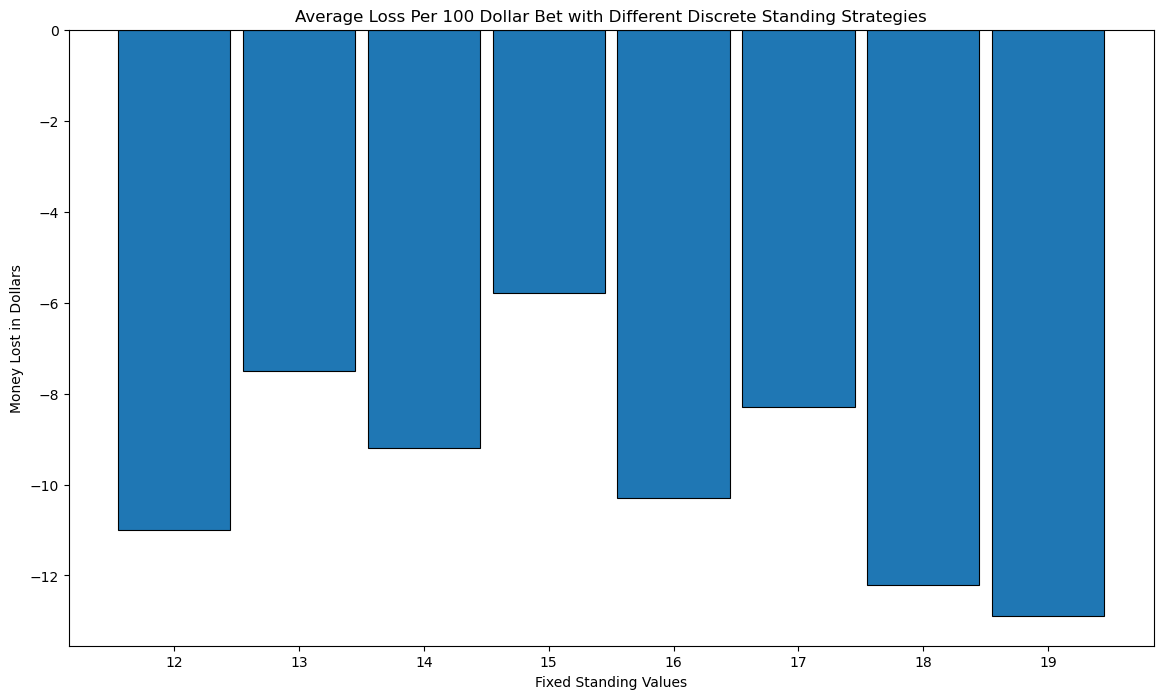

In [5]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(np.arange(12, 20), avg_net_gains, width=0.9, edgecolor="black", linewidth=0.8)
ax.set_xlabel('Fixed Standing Values')
ax.set_ylabel('Money Lost in Dollars')
ax.set_title('Average Loss Per 100 Dollar Bet with Different Discrete Standing Strategies')

As can be seen from the graph above, it seems that the best predicted range for standing is around the 15-17 mark.

### Stochastic Standing Strategy

The next strategy is based off of a probabilistic randomized approach.

In [6]:
avg_net_gains = []

standing_values = [14, 15, 16, 17]
probabilities = [(0.7, 0.3), (0.8, 0.2), (0.9, 0.1)]

for stand_value in standing_values:
    for hit_prob, stand_prob in probabilities:
        def stochastic_stand_strategy(hands, deck, **kwargs):
            while True:
                if hands[0].value() < stand_value:
                    if np.random.rand() < hit_prob:
                        deck.deal(hands[0])
                    else:
                        break
                elif hands[0].value() < 21:
                    if np.random.rand() < stand_prob:
                        deck.deal(hands[0])
                    else:
                        break
                else:
                    break
                    
            return False
        
        all_net_gains = []
        
        for trials in range(1000):
            all_net_gains.append(simulation(stochastic_stand_strategy))
        
        avg_net_gains.append(np.mean(all_net_gains))

print(avg_net_gains)

Player  hand is worth 17 and contains:
Jack of Hearts
7 of Clubs
Dealer  hand is worth 19 and contains:
Ace of Diamonds
8 of Spades
Player  hand is worth 11 and contains:
7 of Diamonds
2 of Clubs
2 of Spades
Dealer  hand is worth 18 and contains:
5 of Clubs
4 of Clubs
9 of Spades
Player  hand is worth 14 and contains:
5 of Spades
9 of Hearts
Dealer  hand is worth 25 and contains:
5 of Clubs
4 of Spades
6 of Clubs
10 of Clubs
Player  hand is worth 25 and contains:
King of Hearts
6 of Diamonds
9 of Hearts
Dealer  hand is worth 22 and contains:
9 of Spades
5 of Diamonds
8 of Hearts
Player  hand is worth 15 and contains:
Ace of Hearts
4 of Diamonds
Dealer  hand is worth 19 and contains:
5 of Spades
4 of Diamonds
Jack of Clubs
Player  hand is worth 15 and contains:
6 of Diamonds
8 of Clubs
Ace of Hearts
Dealer  hand is worth 22 and contains:
King of Clubs
2 of Clubs
4 of Clubs
6 of Diamonds
Player  hand is worth 20 and contains:
King of Diamonds
10 of Diamonds
Dealer  hand is worth 25 and c

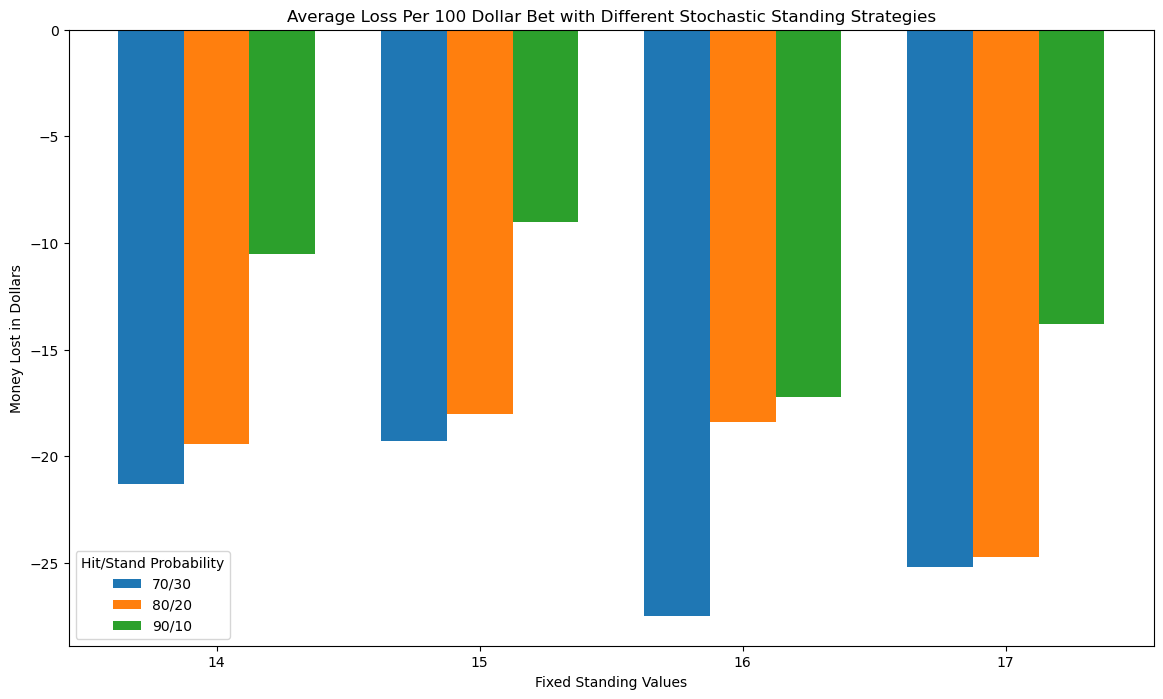

In [7]:
fig, ax = plt.subplots(figsize=(14, 8))

prob_labels = ["70/30", "80/20", "90/10"]

num_bars_per_value = 3
bar_width = 0.25
x = np.arange(len(standing_values))

for i, prob_label in enumerate(prob_labels):
    bar_positions = x + (i - 1) * bar_width
    bar_heights = avg_net_gains[i::num_bars_per_value]
    ax.bar(bar_positions, bar_heights, bar_width, label=prob_label)

ax.set_xticks(x, standing_values)
ax.set_xlabel('Fixed Standing Values')
ax.set_ylabel('Money Lost in Dollars')
ax.set_title('Average Loss Per 100 Dollar Bet with Different Stochastic Standing Strategies')
ax.legend(title='Hit/Stand Probability')

This approach shows that this strategy sucks.

#### Differences between discrete and stochastic strategies

there are some differences

### Basic Strategy

This strategy was developed by someone and is very good at getting wins, giving casino only a 0.5% edge.

<img src="https://www.techopedia.com/wp-content/uploads/2023/04/TECHOPEDIA-DEALERS-CARD-TABLE.png" alt="Blackjack basic strategy chart" width="600">

In [8]:
# Representing the options with numbers 0-3
# Hit = 0, Stand = 1, Split = 2, Double Down = 3
# If double down or split is possible and best choice,
# represent option from table as tuple i.e. D/H = (3, 0)

# If the card total <= 8, always hit
card_total_table = {
    9: [0, (3, 0), (3, 0), (3, 0), (3, 0), 0, 0, 0, 0, 0],
    10: [(3, 0), (3, 0), (3, 0), (3, 0), (3, 0), (3, 0), (3, 0), (3, 0), 0, 0],
    11: [(3, 0), (3, 0), (3, 0), (3, 0), (3, 0), (3, 0), (3, 0), (3, 0), (3, 0), (3, 0)],
    12: [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    13: [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    14: [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    15: [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    16: [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
}
# If the card total >= 17, always stand

ace_table = {
    2: [0, 0, 0, (3, 0), (3, 0), 0, 0, 0, 0, 0],
    3: [0, 0, 0, (3, 0), (3, 0), 0, 0, 0, 0, 0],
    4: [0, 0, (3, 0), (3, 0), (3, 0), 0, 0, 0, 0, 0],
    5: [0, 0, (3, 0), (3, 0), (3, 0), 0, 0, 0, 0, 0],
    6: [0, (3, 0), (3, 0), (3, 0), (3, 0), 0, 0, 0, 0, 0],
    7: [1, (3, 1), (3, 1), (3, 1), (3, 1), 1, 1, 0, 0, 0],
}
# If the card with the ace is >= 8, always stand

# If can't split (not first deal) then play considering card total
pair_table = {
    2: [0, 0, (2, 0), (2, 0), (2, 0), (2, 0), 0, 0, 0, 0],
    3: [0, 0, (2, 0), (2, 0), (2, 0), (2, 0), 0, 0, 0, 0],
    4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    5: [(3, 0), (3, 0), (3, 0), (3, 0), (3, 0), (3, 0), (3, 0), (3, 0), 0, 0],
    6: [0, (2, 0), (2, 1), (2, 1), (2, 1), 0, 0, 0, 0, 0],
    7: [(2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 0), 0, 0, 0, 0],
    8: [(2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0)],
    9: [(2, 1), (2, 1), (2, 1), (2, 1), (2, 1), 1, (2, 1), (2, 1), 1, 1],
    10: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    11: [(2, 0), (2, 0), (2, 1), (2, 1), (2, 1), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0)]
}

hit_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
stand_list = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [9]:
def get_action(hand, dealer_upcard, first_option):
    action = None
    
    if hand[0] == hand[1]:
        # Have to subtract 2 for proper indexing
        # Blackjack card values go from 2-11, table goes from 0-9
        action = pair_table[hand[0].value][dealer_upcard.value - 2]
    elif hand[0].value == 11:
        # If the first card is ace and second is not

        # When the other card value is not in the ace table
        # dictionary, that means we should stand
        action = ace_table.get(hand[1].value, stand_list)[dealer_upcard.value - 2]
    elif hand[1].value == 11:
        # If the second card is ace and first is not
        action = ace_table.get(hand[0].value, stand_list)[dealer_upcard.value - 2]
    elif hand.value() <= 8:
        # Always hit when card total <= 8
        action = 0
    elif hand.value() >= 17:
        # Always stand when card total >= 17
        action = 1
    else:
        # If the card total is between 9-16 (inclusive)
        action = card_total_table[hand.value()][dealer_upcard.value - 2]
    
    if isinstance(action, tuple):
        # If we get a tuple and we have enough money and it is
        # the first deal, we can pick the first option
        if first_option:
            return action[0]
        
        # Otherwise, it is not the first deal but we still
        # received a tuple, so pick second option
        return action[1]
    
    return action
    

In [10]:
def basic_strategy(player_hands, shoe, dealer_upcard, can_bet_more):
    # When dealt first hand, the choice to pick first option only
    # depends on whether we have the money to double down or split
    action = get_action(player_hands[0], dealer_upcard, can_bet_more)

    if action == 0:
        # Action was hitting, so draw a card and keep playing
        shoe.deal(player_hands[0])
    elif action == 1:
        # Action was standing, so return false
        return False
    elif action == 2:
        # Action was splitting, so split hands and keep playing
        split_hands(player_hands, shoe)
    else:
        # Action was doubling down, so draw a card and return true
        shoe.deal(player_hands[0])
        return True
    
    for hand in player_hands:
        # Resetting action for multiple hands
        action = -1

        while hand.value() <= 20 and action != 1:
            # Since it is not the first turn anymore, we cannot split or double down
            action = get_action(hand, dealer_upcard, False)

            if action == 0:
                shoe.deal(hand)

    return False

In [23]:
all_net_gains = []

for trials in range(1000):
    all_net_gains.append(simulation(basic_strategy))
        
avg_net_gain = np.mean(all_net_gains)

print(avg_net_gain)

Player  hand is worth 14 and contains:
6 of Clubs
8 of Diamonds
Dealer  hand is worth 19 and contains:
5 of Hearts
4 of Diamonds
10 of Spades
Player  hand is worth 17 and contains:
4 of Clubs
2 of Spades
Ace of Spades
Dealer  hand is worth 20 and contains:
6 of Hearts
6 of Hearts
8 of Spades
Player  hand is worth 18 and contains:
2 of Spades
3 of Hearts
3 of Diamonds
King of Hearts
Dealer  hand is worth 17 and contains:
3 of Hearts
7 of Spades
7 of Hearts
Player  hand is worth 14 and contains:
10 of Hearts
4 of Diamonds
Dealer  hand is worth 17 and contains:
3 of Diamonds
4 of Diamonds
Queen of Hearts
Player  hand is worth 12 and contains:
Ace of Diamonds
Ace of Hearts
Dealer  hand is worth 20 and contains:
6 of Clubs
Ace of Hearts
3 of Hearts
Player  hand is worth 21 and contains:
Ace of Hearts
Jack of Hearts
Dealer  hand is worth 20 and contains:
6 of Clubs
Ace of Hearts
3 of Hearts
Player  hand is worth 13 and contains:
3 of Spades
Jack of Hearts
Dealer  hand is worth 19 and contain

Best strategy so far, there's many reasons why this might not match the expected 0.5% casino edge, as first of all, our setup and rules are different, we are using rules where can't split after first split, can't double after splitting, no surrendering, and many other nuances. Second, we are assuming a 1:1 payout, when the best odds would happen at 3:2 or 6:5 payout. Third, this number might change due to using a different number of decks or different value than 0.25 for deck penetration.